# 感知器 Perceptron

*上标代表样本编号，下表代表特征编号*

### 迭代训练样本，计算y预测值

$$z={w}_{0}{x}_{0}+{w}_{1}{x}_{1}+...+{w}_{m}{x}_{m}=\sum_{m}^{j=0}{w}_{j}{x}_{j}$$

$$\begin{equation}y=\phi(z)=\begin{cases}1&z\geq\theta\\-1&其他\end{cases}\end{equation}$$

### 更新权重

$${w}_{j}:={w}_{j}+\Delta{w}_{j}$$

$$\Delta{w}_{j}=\eta({y}^{(i)}-{\hat{y}}^{(i)}){x}_{j}^{(i)}$$

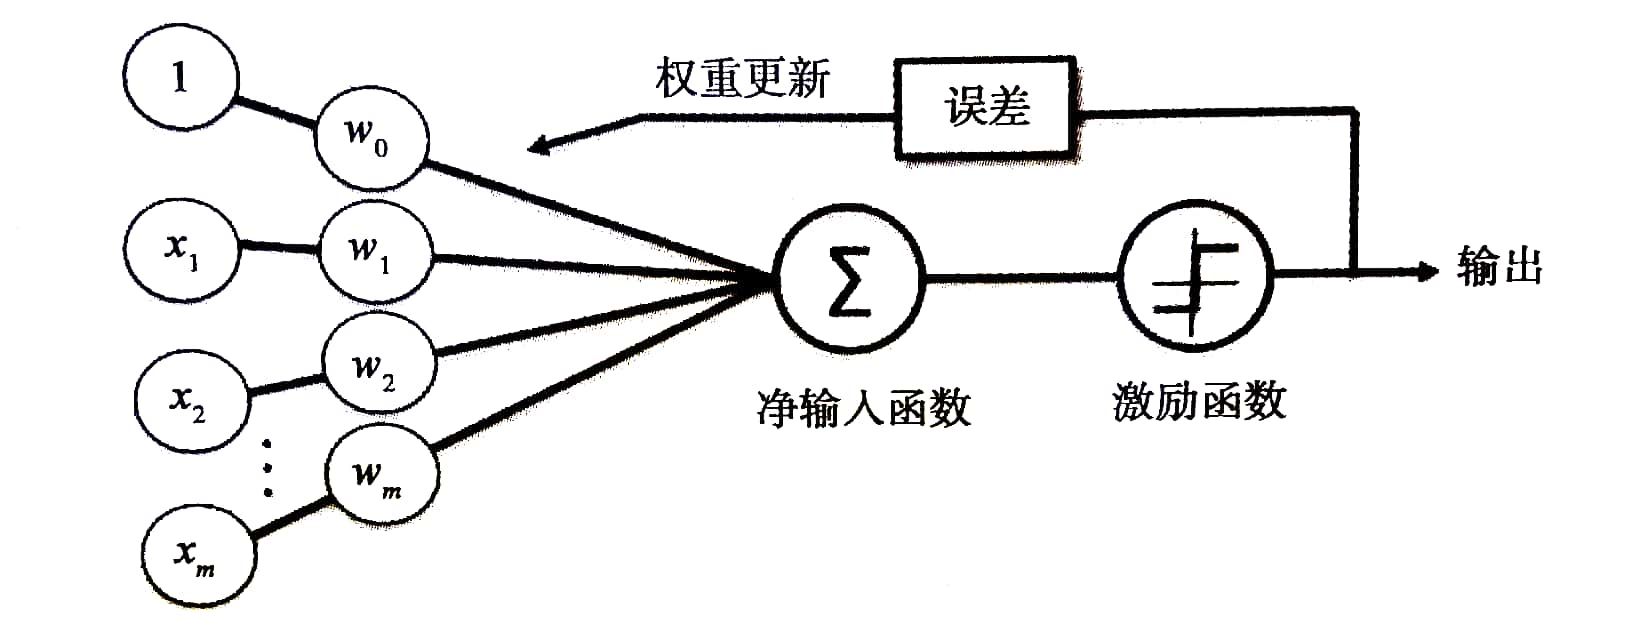

In [1]:
import numpy as np
from matplotlib import pyplot as plt

class Perceptron:
    """感知器

    :param
        eta: float 学习步长，在0到1之间
        iter: int 迭代次数

    :arg
        w: array 权重向量，由目标函数的各特征系数组成，含一个常数项，所以长度为 特征数+1
        errors: list 每次迭代，预测值与实际值不符的样本个数
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """fit训练

        :param
            X: n*m-matrix 样本矩阵，行n为样本数，列m为特征数
            y: array 分类向量， 由分类标签（即-1或1)组成，长度为样本数

        :return
            self: object
        """
        # 创建一个空列表用以记录每次迭代出错次数
        self.errors = list()

        # 创建一个维数比特征数多一的零向量，最后一项为常数项
        self.w = np.zeros(X.shape[1] + 1)

        # 迭代n_iter次
        for each_time in range(self.n_iter):
            # 初始化错误计数器
            n_err = 0
            # 对每个样本进行拟合
            for x_i, y_i in zip(X, y):
                # 根据误差更新权重
                dalta_w = self.eta * (y_i - self.predict(x_i))
                self.w[:-1] += dalta_w * x_i
                self.w[-1] = dalta_w
                # 误差不为0则错误计数器+1
                n_err += int(dalta_w != 0)

            self.errors.append(n_err)

        return self

    def net_input(self, x):
        """净输入函数

        :param
            x: array 样本向量，由各特征值构成

        :return:
            z: float x与w的线性组合
        """
        z = np.dot(x, self.w[:-1]) + self.w[-1]
        return z

    def predict(self, x):
        """激励函数

        :param
            x: array 样本向量，由各特征值构成

        :return:
            y_predict: int 分类预测值 1或-1
        """
        theta = 0.0
        y_predict = np.where(self.net_input(x) >= theta, 1, -1)
        return y_predict
    
    def err_plot(self):
        plt.plot(range(len(self.errors)), self.errors, marker='o')
        plt.xlabel('n_iter')
        plt.ylabel('number of errors')
        plt.show()

## 预览数据

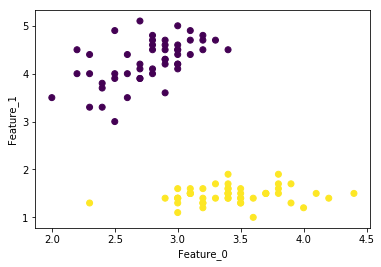

In [2]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

# 样本0-49类标为0，50-99类标为1，100-149类标为2
# 所以只选前100个样本，并将类标转换为1和-1
# 为了可视化方便，只选两个特征
X, y = load_iris(return_X_y=True)
X = X[:100, 1:3]
y = y[:100]
y = np.where(y == 0, 1, -1)

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature_0')
plt.ylabel('Feature_1')
plt.show()

## 使用感知器

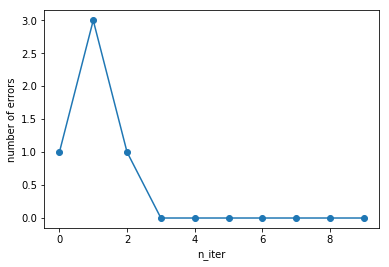

权重系数为：[ 0.72 -1.04  0.  ]


In [3]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
ppn.err_plot()
print(f'权重系数为：{ppn.w}')

## 决策边界可视化

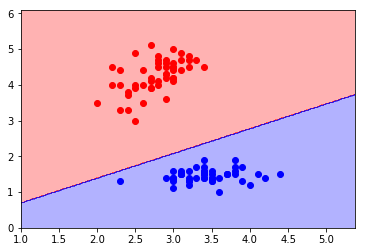

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y ,classifier, resolution=0.02):
    # np.unique(y) 表示y种类数
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 横轴、纵轴范围
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # 把x1_min,x1_max,x2_min,x2_max围合的矩形类所用点用感知器分类， 并根据分类用contourf填色
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 遍历每个类别
    for idx, cl in enumerate(np.unique(y)):
        # 当前类别中，横坐标为特征0， 纵坐标为特征1, 根据类别控制点的颜色
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(cl), label=cl)
    
    plt.show()

plot_decision_regions(X, y, classifier=ppn)